In [12]:
import pandas as pd
df = pd.read_csv(r"C:\Users\rajes\Downloads\Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Label Encoding

In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder() 

df['Gender'] = le.fit_transform(df['Gender'])
df.drop(columns= 'CustomerID', inplace= True)
df.head()


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


# Standalization

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])


# Dimentional Reduction - PCA

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)


# Finding the Nearest neighbour for Epsilon

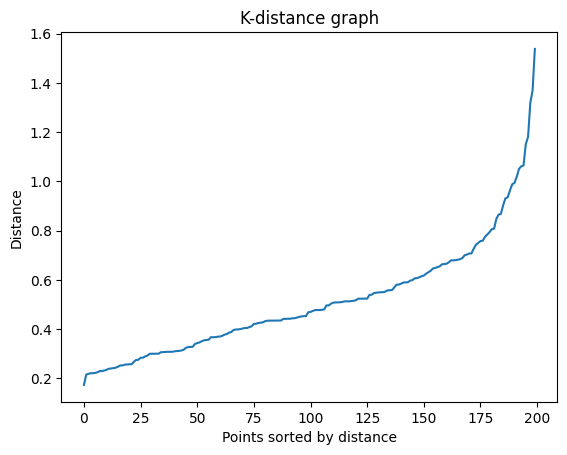

In [16]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

neighbors = NearestNeighbors(n_neighbors=5)
neighbors.fit(scaled_features)


distances, indices = neighbors.kneighbors(scaled_features)


distances = np.sort(distances[:, 4], axis=0)


plt.plot(distances)
plt.xlabel('Points sorted by distance')
plt.ylabel('Distance')
plt.title('K-distance graph')
plt.show()


# DBSCAN - Clustering

In [18]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)  
clusters = dbscan.fit_predict(scaled_features)
clusters 


array([-1,  0, -1,  0, -1,  0, -1, -1, -1,  0, -1, -1, -1,  0, -1,  0,  1,
        0, -1, -1,  1,  0, -1,  0, -1,  0,  1, -1,  1,  0, -1,  0, -1,  0,
       -1,  0, -1,  0,  1,  0, -1,  0,  2,  3,  2, -1,  2,  3,  3,  3,  2,
        3,  3,  2,  2,  2,  2,  2,  3,  2,  2,  3,  2,  2,  2,  3,  2,  2,
        3,  3,  2,  2,  2,  2,  2,  3,  2,  2,  3,  2,  2,  2,  2,  2,  3,
        2,  2,  3, -1,  2,  2,  3,  2,  2,  2,  3,  2,  3,  2,  3,  3,  2,
        2,  3,  2,  3,  2,  2,  2,  2,  2,  3,  2,  3,  3,  3,  2,  2,  2,
        2,  3,  2, -1,  4, -1,  4, -1,  4, -1,  4,  5,  4,  3,  4, -1,  4,
        5,  4, -1,  4, -1,  4, -1,  4, -1,  4, -1,  4, -1,  4,  5,  4,  5,
        4,  5,  4, -1,  4, -1,  4, -1,  4, -1,  4, -1,  4,  5,  4, -1, -1,
        5,  4, -1,  4, -1,  4, -1,  4, -1,  4, -1,  4, -1,  4, -1,  4, -1,
       -1, -1,  4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

# Vizulization

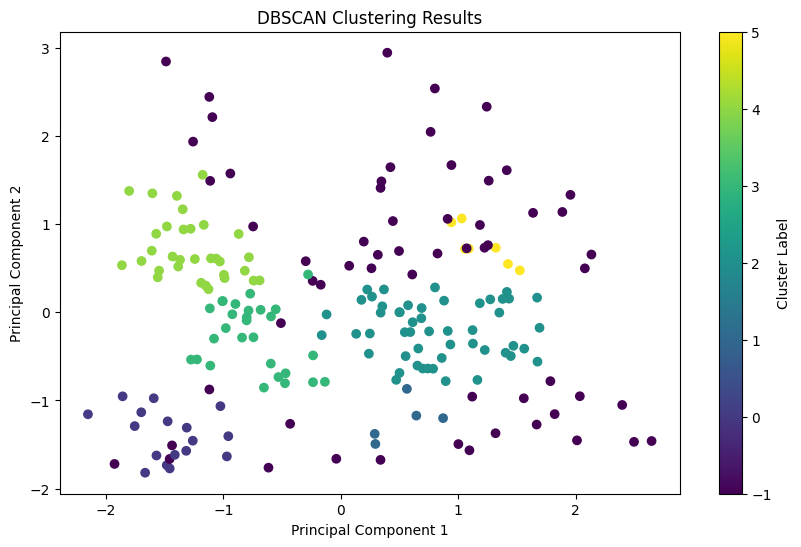

In [19]:
# Scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=clusters, cmap='viridis', marker='o')

plt.colorbar(scatter, label='Cluster Label')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('DBSCAN Clustering Results')
plt.show()